<a href="https://colab.research.google.com/github/ManalSahafi/master-degree/blob/main/NLP/Arabic_Poetry_Classification_based_on_Era.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import nltk 
import string
import re
nltk.download('punkt')
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize , word_tokenize
import codecs
from nltk.stem import arlstem
from collections import Counter
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import tensorflow as tf

from keras.models import Model
from keras.models import load_model


# give a path of model to load function
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt
codecs
from sklearn.svm import SVC

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **Load The raw Dataset**

In [ ]:
path ='/content/drive/MyDrive/NLP Project/PAD_Poetry_Arabic_Dataset.csv'

df = pd.read_csv(path)
df.rename( columns={'Unnamed: 0':'name'}, inplace=True )
df.drop('name', axis=1, inplace=True)

df.rename( columns={'ages':'Labels'}, inplace=True )
df.rename( columns={'string':'Text'}, inplace=True )
df= df[df['Text'].notnull()]
df = shuffle(df)
df

,Poet,Title,Poem,Labels,Poem_clean,remove,convert,Text,procssLabel
5835,الفرزدق,وبيض ترقى من بنات مجاشع,وَبِيضٍ تَرَقّى مِنْ بَناتِ مُجاشِعٍ بهِنّ إلى...,الإسلامي,"[['وبيض', 'ترقى', 'من', 'بنات', 'مجاشع', 'بهن'...","[['وبيض', 'ترقى', 'بنات', 'مجاشع', 'المجد', 'ا...","['وبيض', 'ترقى', 'بنات', 'مجاشع', 'المجد', 'ال...",وبيض ترقى بنات مجاشع المجد التليد مفاخره بنات ...,1
3876,جرير,لقدْ نادى أميركِ باحتمالِ,لقدْ نادى أميركِ باحتمالِ و صدعَ نية َ الأنسِ ...,الإسلامي,"[['لقد', 'نادى', 'اميرك', 'باحتمال', 'و', 'صدع...","[['نادى', 'اميرك', 'باحتمال', 'صدع', 'نية', 'ا...","['نادى', 'اميرك', 'باحتمال', 'صدع', 'نية', 'ال...",نادى اميرك باحتمال صدع نية الانس الحلال امن طر...,1
2291,سوزان عليوان لبنان,غيمة,ليتني غيمة تبكي .بدلاً عن عينيك,الحديث,"[['ليتني', 'غيمة', 'تبكي', 'بدلا', 'عن', 'عيني...","[['ليتني', 'غيمة', 'تبكي', 'عينيك']]","['ليتني', 'غيمة', 'تبكي', 'عينيك']",ليتني غيمة تبكي عينيك,0
5071,عمر ابن أبي ربيعة,يَقُولُ عَتيقٌ إذْ شَكَوْتُ صَبَابَتي,يَقُولُ عَتيقٌ إذْ شَكَوْتُ صَبَابَتي وبينَ دا...,الإسلامي,"[['يقول', 'عتيق', 'اذ', 'شكوت', 'صبابتي', 'وبي...","[['يقول', 'عتيق', 'شكوت', 'صبابتي', 'داء', 'فؤ...","['يقول', 'عتيق', 'شكوت', 'صبابتي', 'داء', 'فؤا...",يقول عتيق شكوت صبابتي داء فؤادي مخامر احقا لئن...,1
3286,حسان بن ثابت,أهاجَكَ بالبَيْداء رَسْمُ المنازِلِ،,أهاجَكَ بالبَيْداء رَسْمُ المنازِلِ، نعم قد عف...,الإسلامي,"[['اهاجك', 'بالبيداء', 'رسم', 'المنازل', 'نعم'...","[['اهاجك', 'بالبيداء', 'رسم', 'المنازل', 'عفاه...","['اهاجك', 'بالبيداء', 'رسم', 'المنازل', 'عفاها...",اهاجك بالبيداء رسم المنازل عفاها اسحم هاطل وجر...,1
...,...,...,...,...,...,...,...,...,...
1125,نزار قباني سوريا,مَصْلوبَة النهدَين,مَصْلوبَةَ النهدين . يالي منهُما تركا الرِدا ....,الحديث,"[['مصلوبة', 'النهدين', 'يالي', 'منهما', 'تركا'...","[['مصلوبة', 'النهدين', 'يالي', 'تركا', 'الردا'...","['مصلوبة', 'النهدين', 'يالي', 'تركا', 'الردا',...",مصلوبة النهدين يالي تركا الردا وتسلقا اضلاعي و...,0
4073,عمر ابن أبي ربيعة,قفْ بالديارِ عفا من اهلها الأثرُ،,قفْ بالديارِ عفا من اهلها الأثرُ، عفى معالمها ...,الإسلامي,"[['قف', 'بالديار', 'عفا', 'من', 'اهلها', 'الاث...","[['قف', 'بالديار', 'عفا', 'اهلها', 'الاثر', 'ع...","['قف', 'بالديار', 'عفا', 'اهلها', 'الاثر', 'عف...",قف بالديار عفا اهلها الاثر عفى معالمها الارواح...,1
757,عمر أبو ريشة سوريا,في موسم الورد,هنــا في موســـم الوردِ تلاقَيْنــا بـلا وَعْـ...,الحديث,"[['هنا', 'في', 'موسم', 'الورد', 'تلاقينا', 'بل...","[['موسم', 'الورد', 'تلاقينا', 'وعد', 'وسرنا', ...","['موسم', 'الورد', 'تلاقينا', 'وعد', 'وسرنا', '...",موسم الورد تلاقينا وعد وسرنا جلال الصمت مناكب ...,0
3481,حسان بن ثابت,واللهِ ربي لا نفارقُ ماجداً،,واللهِ ربي لا نفارقُ ماجداً، عَفَّ الخَلِيقَة ...,الإسلامي,"[['والله', 'ربي', 'لا', 'نفارق', 'ماجدا', 'عف'...","[['والله', 'ربي', 'نفارق', 'ماجدا', 'عف', 'الخ...","['والله', 'ربي', 'نفارق', 'ماجدا', 'عف', 'الخل...",والله ربي نفارق ماجدا عف الخليقة ماجد الاجداد ...,1


# **Text Preprocessing**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


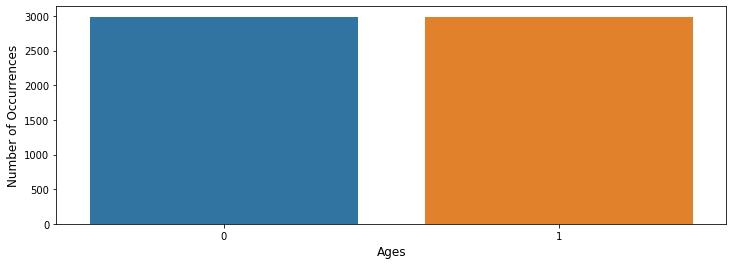

In [ ]:
cnt_pro = df['procssLabel'].value_counts()

plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values)

plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Ages', fontsize=12)

#plt.xticks(rotation=90)
plt.show()

In [ ]:
train, test = train_test_split(df ,test_size=0.3, random_state=42)

train_tagged = train.apply(
    lambda r: TaggedDocument(words=r['Text'].split(), tags=[r.procssLabel]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=r['Text'].split(), tags=[r.procssLabel]), axis=1)

# This list can also be considered as our first paragraph vector
train_tagged.values[1]

TaggedDocument(words=['يظعن', 'الشيب', 'الشباب', 'ترى', 'لمة', 'يرم', 'غرابها', 'لئن', 'نفسي', 'تجيب', 'لطال', 'اقرت', 'بعيني', 'يغيم', 'سحابها', 'واصبحت', 'النسر', 'واقعا', 'وافناه', 'كر', 'الليالي', 'ذهابها', 'ومايرة', 'الاعضاد', 'اجهضت', 'نتيج', 'خداج', 'ناج', 'هبابها', 'تعاللتها', 'بالسوط', 'التياثها', 'بمقورة', 'الاعلام', 'يطفو', 'سرابها', 'زوري', 'بلالا', 'الحاجات', 'تنضى', 'ركابها', 'حلفت', 'ياثم', 'يمينه', 'اثمت', 'لاقيه', 'عذابها', 'لئن', 'ارضي', 'بلال', 'بدفقة', 'الغيث', 'يمنى', 'يديه', 'انسكابها', 'اكن', 'صاب', 'الحيا', 'ارضه', 'سقاها', 'جديبا', 'جنابها', 'فاصبح', 'رواه', 'جانب', 'مطرات', 'مستهل', 'ربابها', 'فتى', 'تقصر', 'الفتيان', 'فعاله', 'للحرب', 'يخبو', 'شهابها', 'المشتري', 'بالسيف', 'افضل', 'غلا', 'مارحى', 'الحرب', 'استدر', 'ضرابها', 'ابى', 'لبلال', 'كفيه', 'حيا', 'الارض', 'يسقي', 'محل', 'حبابها', 'ابن', 'ابي', 'موسى', 'لحاجات', 'اصحاب', 'الرسول', 'كتابها', 'رايت', 'بلالا', 'جرى', 'جاء', 'سابقا', 'وذلت', 'للحرب', 'قسرا', 'صعابها', 'يطمئن', 'الخائفون', 'وغيثه', 'بلاد', 

In [ ]:
import multiprocessing

cores = multiprocessing.cpu_count()

In [ ]:
# Train doc2vec model

alpha = 0.025
vec_size = 100
model_dbow = Doc2Vec(dm=0, vector_size=vec_size, min_count=3, alpha=alpha, min_alpha=0.00025, workers=cores, sample=0, hs=1, negative=0)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

len(model_dbow.wv.vocab)

#Print model vocabulary
model_dbow.wv.vocab

100%|██████████| 4185/4185 [00:00<00:00, 653335.40it/s]


{'ذكر': <gensim.models.keyedvectors.Vocab at 0x7f85c0a58690>,
 'الرباب': <gensim.models.keyedvectors.Vocab at 0x7f85ba58cd10>,
 'هجرا': <gensim.models.keyedvectors.Vocab at 0x7f85b6c6dad0>,
 'ذكرى': <gensim.models.keyedvectors.Vocab at 0x7f85b6c6df50>,
 'قريبة': <gensim.models.keyedvectors.Vocab at 0x7f85b6c6d910>,
 'احدثت': <gensim.models.keyedvectors.Vocab at 0x7f85b6c6d3d0>,
 'وطرا': <gensim.models.keyedvectors.Vocab at 0x7f85b6c6de50>,
 'ولها': <gensim.models.keyedvectors.Vocab at 0x7f85b6c6d150>,
 'باعلى': <gensim.models.keyedvectors.Vocab at 0x7f85b6c6de10>,
 'الخيف': <gensim.models.keyedvectors.Vocab at 0x7f85b6c6d390>,
 'منزلة': <gensim.models.keyedvectors.Vocab at 0x7f85b6c6dd50>,
 'هاجت': <gensim.models.keyedvectors.Vocab at 0x7f85b6c6d310>,
 'شوقا': <gensim.models.keyedvectors.Vocab at 0x7f85b68d6c50>,
 'والبرد': <gensim.models.keyedvectors.Vocab at 0x7f85b68d6550>,
 'طاف': <gensim.models.keyedvectors.Vocab at 0x7f85b68d6ed0>,
 'قالت': <gensim.models.keyedvectors.Vocab at 0x

# **Train the model DBOW**


In [ ]:
%%time
max_epochs = 60
for epoch in range(max_epochs):
    print("Training on epoch %s" %epoch)
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.0002 # decrease the learning rate
    model_dbow.min_alpha = model_dbow.alpha # fix the learning rate, no decay

Training on epoch 0


100%|██████████| 4185/4185 [00:00<00:00, 365226.74it/s]


Training on epoch 1


100%|██████████| 4185/4185 [00:00<00:00, 764410.67it/s]


Training on epoch 2


100%|██████████| 4185/4185 [00:00<00:00, 1161614.87it/s]


Training on epoch 3


100%|██████████| 4185/4185 [00:00<00:00, 1258742.36it/s]


Training on epoch 4


100%|██████████| 4185/4185 [00:00<00:00, 1253170.72it/s]


Training on epoch 5


100%|██████████| 4185/4185 [00:00<00:00, 1130492.83it/s]


Training on epoch 6


100%|██████████| 4185/4185 [00:00<00:00, 1195882.43it/s]


Training on epoch 7


100%|██████████| 4185/4185 [00:00<00:00, 434387.44it/s]


Training on epoch 8


100%|██████████| 4185/4185 [00:00<00:00, 1001664.13it/s]


Training on epoch 9


100%|██████████| 4185/4185 [00:00<00:00, 1065248.35it/s]


Training on epoch 10


100%|██████████| 4185/4185 [00:00<00:00, 941289.27it/s]


Training on epoch 11


100%|██████████| 4185/4185 [00:00<00:00, 698549.91it/s]


Training on epoch 12


100%|██████████| 4185/4185 [00:00<00:00, 1108014.28it/s]


Training on epoch 13


100%|██████████| 4185/4185 [00:00<00:00, 1009034.39it/s]


Training on epoch 14


100%|██████████| 4185/4185 [00:00<00:00, 1242437.87it/s]


Training on epoch 15


100%|██████████| 4185/4185 [00:00<00:00, 1731593.39it/s]


Training on epoch 16


100%|██████████| 4185/4185 [00:00<00:00, 1039079.04it/s]


Training on epoch 17


100%|██████████| 4185/4185 [00:00<00:00, 1006027.18it/s]


Training on epoch 18


100%|██████████| 4185/4185 [00:00<00:00, 713282.22it/s]


Training on epoch 19


100%|██████████| 4185/4185 [00:00<00:00, 844186.13it/s]


Training on epoch 20


100%|██████████| 4185/4185 [00:00<00:00, 1547897.90it/s]


Training on epoch 21


100%|██████████| 4185/4185 [00:00<00:00, 1443872.85it/s]


Training on epoch 22


100%|██████████| 4185/4185 [00:00<00:00, 1070445.31it/s]


Training on epoch 23


100%|██████████| 4185/4185 [00:00<00:00, 1540967.63it/s]


Training on epoch 24


100%|██████████| 4185/4185 [00:00<00:00, 362286.89it/s]


Training on epoch 25


100%|██████████| 4185/4185 [00:00<00:00, 991984.30it/s]


Training on epoch 26


100%|██████████| 4185/4185 [00:00<00:00, 1123114.87it/s]


Training on epoch 27


100%|██████████| 4185/4185 [00:00<00:00, 735858.23it/s]


Training on epoch 28


100%|██████████| 4185/4185 [00:00<00:00, 1016513.91it/s]


Training on epoch 29


100%|██████████| 4185/4185 [00:00<00:00, 705569.67it/s]


Training on epoch 30


100%|██████████| 4185/4185 [00:00<00:00, 1422114.74it/s]


Training on epoch 31


100%|██████████| 4185/4185 [00:00<00:00, 659694.91it/s]


Training on epoch 32


100%|██████████| 4185/4185 [00:00<00:00, 1006719.56it/s]


Training on epoch 33


100%|██████████| 4185/4185 [00:00<00:00, 683720.73it/s]


Training on epoch 34


100%|██████████| 4185/4185 [00:00<00:00, 1392776.50it/s]


Training on epoch 35


100%|██████████| 4185/4185 [00:00<00:00, 625602.76it/s]


Training on epoch 36


100%|██████████| 4185/4185 [00:00<00:00, 994908.02it/s]


Training on epoch 37


100%|██████████| 4185/4185 [00:00<00:00, 1774839.46it/s]


Training on epoch 38


100%|██████████| 4185/4185 [00:00<00:00, 1587515.80it/s]


Training on epoch 39


100%|██████████| 4185/4185 [00:00<00:00, 906250.31it/s]


Training on epoch 40


100%|██████████| 4185/4185 [00:00<00:00, 1043836.96it/s]


Training on epoch 41


100%|██████████| 4185/4185 [00:00<00:00, 1018401.15it/s]


Training on epoch 42


100%|██████████| 4185/4185 [00:00<00:00, 1274091.76it/s]


Training on epoch 43


100%|██████████| 4185/4185 [00:00<00:00, 1182429.25it/s]


Training on epoch 44


100%|██████████| 4185/4185 [00:00<00:00, 1787309.06it/s]


Training on epoch 45


100%|██████████| 4185/4185 [00:00<00:00, 1371126.56it/s]


Training on epoch 46


100%|██████████| 4185/4185 [00:00<00:00, 1230937.04it/s]


Training on epoch 47


100%|██████████| 4185/4185 [00:00<00:00, 1113638.01it/s]


Training on epoch 48


100%|██████████| 4185/4185 [00:00<00:00, 1590392.52it/s]


Training on epoch 49


100%|██████████| 4185/4185 [00:00<00:00, 1193686.65it/s]


Training on epoch 50


100%|██████████| 4185/4185 [00:00<00:00, 1608316.13it/s]


Training on epoch 51


100%|██████████| 4185/4185 [00:00<00:00, 728891.38it/s]


Training on epoch 52


100%|██████████| 4185/4185 [00:00<00:00, 1518045.68it/s]


Training on epoch 53


100%|██████████| 4185/4185 [00:00<00:00, 468096.81it/s]


Training on epoch 54


100%|██████████| 4185/4185 [00:00<00:00, 1064085.97it/s]


Training on epoch 55


100%|██████████| 4185/4185 [00:00<00:00, 1517651.93it/s]


Training on epoch 56


100%|██████████| 4185/4185 [00:00<00:00, 1307303.36it/s]


Training on epoch 57


100%|██████████| 4185/4185 [00:00<00:00, 1660187.48it/s]


Training on epoch 58


100%|██████████| 4185/4185 [00:00<00:00, 649515.72it/s]


Training on epoch 59


100%|██████████| 4185/4185 [00:00<00:00, 659026.18it/s]


CPU times: user 1min 33s, sys: 1.67 s, total: 1min 34s
Wall time: 1min 1s


In [ ]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

# **Train and predict Logistic Regression Classifier with model DBOW**

In [ ]:
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)

logreg = LogisticRegression(penalty = 'l2',solver = 'liblinear', max_iter=5000, random_state = 1)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
print(classification_report(y_test, y_pred))

Testing accuracy 0.9459308807134894
Testing F1 score: 0.9459302252110431
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       878
           1       0.95      0.95      0.95       916

    accuracy                           0.95      1794
   macro avg       0.95      0.95      0.95      1794
weighted avg       0.95      0.95      0.95      1794



# **Train and predict SVM Classifier with model DBOW**

In [ ]:
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)

svm_classifier = SVC()
svm_classifier.fit(X_train,y_train)
print("Prediction numbers:")
y_pred = svm_classifier.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
print(classification_report(y_test, y_pred))

Prediction numbers:
Testing accuracy 0.9464882943143813
Testing F1 score: 0.9464783105885202
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       878
           1       0.94      0.95      0.95       916

    accuracy                           0.95      1794
   macro avg       0.95      0.95      0.95      1794
weighted avg       0.95      0.95      0.95      1794



# **Train the model Distributed Memory(DM)**

In [ ]:
alpha=0.025
vec_size = 100

model_dmm = Doc2Vec(dm=1, vector_size=vec_size, min_count=3, alpha=alpha, min_alpha=0.00025, workers=cores, sample=0, hs=1, negative=0)
model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 4185/4185 [00:00<00:00, 1098170.81it/s]


In [ ]:
%%time 
max_epochs = 60
for epoch in range(max_epochs):
  print("Training on epoch %s" %epoch)
  
  model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs= 1 )
  model_dmm.alpha -= 0.0002 # decrease the learning rate
  model_dmm.min_alpha = model_dmm.alpha # fix the learning rate, no decay

Training on epoch 0


100%|██████████| 4185/4185 [00:00<00:00, 909443.15it/s]


Training on epoch 1


100%|██████████| 4185/4185 [00:00<00:00, 1598357.52it/s]


Training on epoch 2


100%|██████████| 4185/4185 [00:00<00:00, 1448639.29it/s]


Training on epoch 3


100%|██████████| 4185/4185 [00:00<00:00, 1698583.53it/s]


Training on epoch 4


100%|██████████| 4185/4185 [00:00<00:00, 1602735.78it/s]


Training on epoch 5


100%|██████████| 4185/4185 [00:00<00:00, 974959.02it/s]


Training on epoch 6


100%|██████████| 4185/4185 [00:00<00:00, 1650043.45it/s]


Training on epoch 7


100%|██████████| 4185/4185 [00:00<00:00, 1721573.39it/s]


Training on epoch 8


100%|██████████| 4185/4185 [00:00<00:00, 934126.03it/s]


Training on epoch 9


100%|██████████| 4185/4185 [00:00<00:00, 1419125.41it/s]


Training on epoch 10


100%|██████████| 4185/4185 [00:00<00:00, 1645249.06it/s]


Training on epoch 11


100%|██████████| 4185/4185 [00:00<00:00, 941339.75it/s]


Training on epoch 12


100%|██████████| 4185/4185 [00:00<00:00, 1222024.66it/s]


Training on epoch 13


100%|██████████| 4185/4185 [00:00<00:00, 1659089.06it/s]


Training on epoch 14


100%|██████████| 4185/4185 [00:00<00:00, 1022911.55it/s]


Training on epoch 15


100%|██████████| 4185/4185 [00:00<00:00, 1034364.30it/s]


Training on epoch 16


100%|██████████| 4185/4185 [00:00<00:00, 855458.95it/s]


Training on epoch 17


100%|██████████| 4185/4185 [00:00<00:00, 862012.58it/s]


Training on epoch 18


100%|██████████| 4185/4185 [00:00<00:00, 811144.28it/s]


Training on epoch 19


100%|██████████| 4185/4185 [00:00<00:00, 1657678.93it/s]


Training on epoch 20


100%|██████████| 4185/4185 [00:00<00:00, 1570752.77it/s]


Training on epoch 21


100%|██████████| 4185/4185 [00:00<00:00, 997282.10it/s]


Training on epoch 22


100%|██████████| 4185/4185 [00:00<00:00, 1066348.47it/s]


Training on epoch 23


100%|██████████| 4185/4185 [00:00<00:00, 1257479.92it/s]


Training on epoch 24


100%|██████████| 4185/4185 [00:00<00:00, 1523315.30it/s]


Training on epoch 25


100%|██████████| 4185/4185 [00:00<00:00, 670479.84it/s]


Training on epoch 26


100%|██████████| 4185/4185 [00:00<00:00, 644247.31it/s]


Training on epoch 27


100%|██████████| 4185/4185 [00:00<00:00, 1007181.68it/s]


Training on epoch 28


100%|██████████| 4185/4185 [00:00<00:00, 1250581.52it/s]


Training on epoch 29


100%|██████████| 4185/4185 [00:00<00:00, 867722.69it/s]


Training on epoch 30


100%|██████████| 4185/4185 [00:00<00:00, 905128.77it/s]


Training on epoch 31


100%|██████████| 4185/4185 [00:00<00:00, 550652.89it/s]


Training on epoch 32


100%|██████████| 4185/4185 [00:00<00:00, 1154737.34it/s]


Training on epoch 33


100%|██████████| 4185/4185 [00:00<00:00, 1598211.99it/s]


Training on epoch 34


100%|██████████| 4185/4185 [00:00<00:00, 914703.61it/s]


Training on epoch 35


100%|██████████| 4185/4185 [00:00<00:00, 905035.43it/s]


Training on epoch 36


100%|██████████| 4185/4185 [00:00<00:00, 1272982.97it/s]


Training on epoch 37


100%|██████████| 4185/4185 [00:00<00:00, 1686020.77it/s]


Training on epoch 38


100%|██████████| 4185/4185 [00:00<00:00, 1110397.41it/s]


Training on epoch 39


100%|██████████| 4185/4185 [00:00<00:00, 591533.40it/s]


Training on epoch 40


100%|██████████| 4185/4185 [00:00<00:00, 1616015.67it/s]


Training on epoch 41


100%|██████████| 4185/4185 [00:00<00:00, 826731.45it/s]


Training on epoch 42


100%|██████████| 4185/4185 [00:00<00:00, 875469.44it/s]


Training on epoch 43


100%|██████████| 4185/4185 [00:00<00:00, 1577670.52it/s]


Training on epoch 44


100%|██████████| 4185/4185 [00:00<00:00, 1435137.13it/s]


Training on epoch 45


100%|██████████| 4185/4185 [00:00<00:00, 1535709.73it/s]


Training on epoch 46


100%|██████████| 4185/4185 [00:00<00:00, 1351594.84it/s]


Training on epoch 47


100%|██████████| 4185/4185 [00:00<00:00, 1161845.53it/s]


Training on epoch 48


100%|██████████| 4185/4185 [00:00<00:00, 1233012.24it/s]


Training on epoch 49


100%|██████████| 4185/4185 [00:00<00:00, 1251830.14it/s]


Training on epoch 50


100%|██████████| 4185/4185 [00:00<00:00, 979966.63it/s]


Training on epoch 51


100%|██████████| 4185/4185 [00:00<00:00, 628965.25it/s]


Training on epoch 52


100%|██████████| 4185/4185 [00:00<00:00, 839502.71it/s]


Training on epoch 53


100%|██████████| 4185/4185 [00:00<00:00, 796061.78it/s]


Training on epoch 54


100%|██████████| 4185/4185 [00:00<00:00, 1569348.43it/s]


Training on epoch 55


100%|██████████| 4185/4185 [00:00<00:00, 1149368.93it/s]


Training on epoch 56


100%|██████████| 4185/4185 [00:00<00:00, 1808858.43it/s]


Training on epoch 57


100%|██████████| 4185/4185 [00:00<00:00, 984142.31it/s]


Training on epoch 58


100%|██████████| 4185/4185 [00:00<00:00, 1119818.96it/s]


Training on epoch 59


100%|██████████| 4185/4185 [00:00<00:00, 1619893.16it/s]


CPU times: user 2min 7s, sys: 2.57 s, total: 2min 9s
Wall time: 1min 17s


# **Train and predict Logistic Regression Classifier with model DM**

In [ ]:
y_train, X_train = vec_for_learning(model_dmm, train_tagged)
y_test, X_test = vec_for_learning(model_dmm, test_tagged)

logreg = LogisticRegression(penalty = 'l2',solver = 'liblinear', max_iter=5000, random_state = 1)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
print(classification_report(y_test, y_pred))

Testing accuracy 0.8885172798216276
Testing F1 score: 0.888354761278262
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       878
           1       0.87      0.92      0.89       916

    accuracy                           0.89      1794
   macro avg       0.89      0.89      0.89      1794
weighted avg       0.89      0.89      0.89      1794



In [ ]:
y_train, X_train = vec_for_learning(model_dmm, train_tagged)
y_test, X_test = vec_for_learning(model_dmm, test_tagged)

svm_classifier = SVC()
svm_classifier.fit(X_train,y_train)
print("Prediction numbers:")
y_pred = svm_classifier.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
print(classification_report(y_test, y_pred))

Prediction numbers:
Testing accuracy 0.5211817168338907
Testing F1 score: 0.39006518268738033
              precision    recall  f1-score   support

           0       0.51      1.00      0.67       878
           1       0.97      0.06      0.12       916

    accuracy                           0.52      1794
   macro avg       0.74      0.53      0.40      1794
weighted avg       0.74      0.52      0.39      1794



**Predicts with DBOW** 

In [ ]:
# with DBOW
test_doc = word_tokenize("لنا منكب الاسلام والهامة وانا لمما تضرب الكبش ضربة على راسه والحرب قد لاح نارها")
test_doc_vector = model_dbow.infer_vector(test_doc)
model_dbow.docvecs.most_similar(positive = [test_doc_vector])

[(1, 0.4618702232837677), (0, 0.030529506504535675)]

**Predicts with DM**

In [ ]:
# with DM
test_doc = word_tokenize("لنا منكب الاسلام والهامة وانا لمما تضرب الكبش ضربة على راسه والحرب قد لاح نارها")
test_doc_vector = model_dmm.infer_vector(test_doc)
model_dmm.docvecs.most_similar(positive = [test_doc_vector])

[(1, 0.10873958468437195), (0, -0.09453152120113373)]